## Final project

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import glob
import os
from pathlib import Path
import nltk
import sklearn
# nltk.download('wordnet')

In [8]:
repo = Path(os.getcwd())
data_path = repo / '..' / 'data'

In [9]:
df = pd.read_csv('/Users/guanlxy/Desktop/train1.csv')

In [10]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    text = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    text = ' '.join(text)
    return text

In [11]:
df['tweet'] = df['tweet'].apply(lemmatize_text)

In [12]:
kw = pd.get_dummies(df['keyword'], prefix = 'kw')
df = pd.concat([df,kw], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

X = df
y = df["target"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
X_train_ef = X_train[['uprchar_pct', 'lwrchar_pct', 'lwrcase_pct',
                          'upprcase_pct', 'titlecase_pct']]
X_train_kw = X_train[list(kw.columns)]
X_train = X_train['tweet']

In [15]:
X_test_ef = X_test[['uprchar_pct', 'lwrchar_pct', 'lwrcase_pct',
                          'upprcase_pct', 'titlecase_pct']]
X_test_kw = X_test[list(kw.columns)]
X_test = X_test['tweet']

In [16]:
X = X['tweet']

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
stops = set(stopwords.words('english'))
stops = map(lambda x:x.lower(),stops)
vectorizer = TfidfVectorizer(stop_words=stops)
vectorizer.fit(X)

# extract features
x_train = vectorizer.transform(X_train)
x_test = vectorizer.transform(X_test)

In [18]:
print(x_train.shape, x_test.shape)

(5329, 12866) (2284, 12866)


In [19]:
print(x_train)

  (0, 9930)	0.20582834414220255
  (0, 7326)	0.3614113438851259
  (0, 6350)	0.3614113438851259
  (0, 5473)	0.3614113438851259
  (0, 5040)	0.2659294156250075
  (0, 4847)	0.24528497167141225
  (0, 4735)	0.2853372845634747
  (0, 3791)	0.22976915945626086
  (0, 3782)	0.23044907803698875
  (0, 3203)	0.2568672861391151
  (0, 1088)	0.3614113438851259
  (0, 723)	0.2065659949504776
  (0, 42)	0.09116227423675748
  (1, 12578)	0.3037626346199571
  (1, 12414)	0.26599034991348225
  (1, 11423)	0.39191936288492396
  (1, 8793)	0.29026197183310976
  (1, 8344)	0.19754230345850216
  (1, 7435)	0.2705780026002707
  (1, 6913)	0.2388365746306679
  (1, 6215)	0.2186967469744447
  (1, 4707)	0.2248182689670968
  (1, 2567)	0.3064987081072414
  (1, 1206)	0.4873738713420614
  (2, 12303)	0.3162933852416479
  :	:
  (5326, 841)	0.2139675191536505
  (5326, 41)	0.13671228024038942
  (5327, 11510)	0.3408013916275955
  (5327, 10678)	0.2964668082355582
  (5327, 10527)	0.30362383003428467
  (5327, 10114)	0.28888322950989065
 

In [13]:
# x_test_tfidf = pd.DataFrame(x_test.todense(), columns=vectorizer.get_feature_names())
# x_test_ef = X_test_ef.reset_index(drop=True)
# x_test = pd.concat([x_test_tfidf, x_test_ef], axis=1)

x_test = pd.DataFrame(x_test.todense(), columns=vectorizer.get_feature_names())
x_test_kw = X_test_kw.reset_index(drop=True)
x_test_ef = X_test_ef.reset_index(drop=True)
x_test = pd.concat([x_test, x_test_kw, x_test_ef], axis=1)

In [14]:
# x_train_tfidf = pd.DataFrame(x_train.todense(), columns=vectorizer.get_feature_names())
# x_train_ef = X_train_ef.reset_index(drop=True)
# x_train = pd.concat([x_train_tfidf, x_train_ef], axis=1)

x_train = pd.DataFrame(x_train.todense(), columns=vectorizer.get_feature_names())
x_train_kw = X_train_kw.reset_index(drop=True)
x_train_ef = X_train_ef.reset_index(drop=True)
x_train = pd.concat([x_train, x_train_kw, x_train_ef], axis=1)

### PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
# pca = PCA(n_components=1750)
# pca.fit(x_train)
# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression

review_classifier = LogisticRegression(random_state = 0).fit(x_train, y_train)

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# precision, recall, f1, and average precision below
y_pred = review_classifier.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.79
Recall: 0.71
F1: 0.75
Average Precision: 0.68


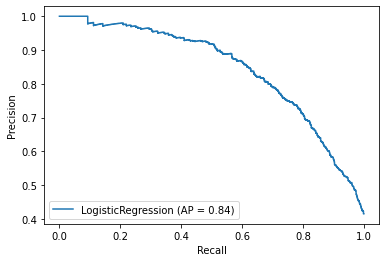

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# plot precision-recall curve
y_pred_prob = review_classifier.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
plot_precision_recall_curve(estimator=review_classifier, X=x_test, y=y_test)

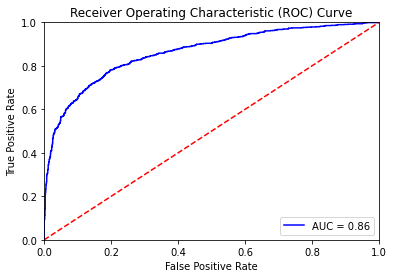

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# plot ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt_clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [23]:
y_pred = dt_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.65
Recall: 0.6
F1: 0.62
Average Precision: 0.56


### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [23]:
X = x_train
y = y_train

In [24]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X,y)
print (rf0.oob_score_)
y_predprob = rf0.predict_proba(X)[:,1]
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

0.7689998123475323
AUC Score (Train): 0.999108


In [27]:
param_test1 = {'n_estimators':range(10,271,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_


({'n_estimators': 250}, 0.7702992926961635)

In [28]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 250, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.best_params_, gsearch2.best_score_



/Users/guanlxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 7, 'min_samples_split': 110}, 0.7705971010084746)

In [36]:
rf1 = RandomForestClassifier(n_estimators= 250, max_depth=7, min_samples_split=110,
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10)
rf1.fit(X,y)
print (rf1.oob_score_)

0.5747795083505348


In [30]:
param_test4 = {'max_features':range(3,11,2)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 250, max_depth=7, min_samples_split=110,
                                  min_samples_leaf=20 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.best_params_, gsearch4.best_score_



/Users/guanlxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_features': 9}, 0.5883689167993607)

In [31]:
rf2 = RandomForestClassifier(n_estimators= 250, max_depth=7, min_samples_split=110,
                                  min_samples_leaf=20,max_features=9 ,oob_score=True, random_state=10)
rf2.fit(X,y)
print (rf2.oob_score_)

0.5637080127603677


In [59]:
y_pred = rf0.predict(x_test)
y_pred1 = rf1.predict(x_test)
y_pred2 = rf2.predict(x_test)

print("accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import average_precision_score,precision_score
precision = precision_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred)
print("average_precision:",average_precision)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)
print("AUC Score (Test):",roc_auc_score)
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

accuracy: 0.7898423817863398
average_precision: 0.6746800373697498
precision: 0.8488023952095808
recall: 0.5993657505285412
f1: 0.7026022304832714
AUC Score (Test): 0.7619399754137476
AUC Score (Train): 0.999108


Text(0.5, 1.0, 'Random Tree: AP=0.67')

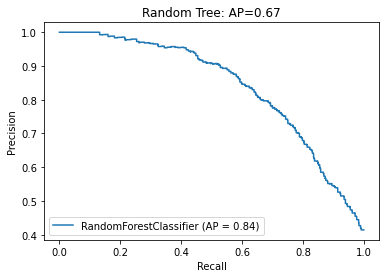

In [62]:
disp = plot_precision_recall_curve(rf0, x_test, y_test)
disp.ax_.set_title('Random Tree: '
                   'AP={0:0.2f}'.format(average_precision))


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0).fit(x_train, y_train)

In [26]:
y_pred = rf_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.88
Recall: 0.59
F1: 0.71
Average Precision: 0.69


### MLP Neural Net Classifier

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
mlp_clf = MLPClassifier(random_state=0, max_iter=300).fit(x_train, y_train)

In [29]:
y_pred = mlp_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.73
Recall: 0.72
F1: 0.73
Average Precision: 0.65
